In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
df=pd.read_excel('/content/Dataset_AQI25-4.xlsx')
df.dtypes
df



,City,AQI,PM2.5,PM10,O3,NO2,SO2,CO,Latitude,Longitude,Time
0,"Gulzarpet, Anantapur, India",92,92.0,39.0,22.2,4.4,3.3,4.5,14.675886,77.593027,2024-04-25 14:00:00
1,"Anand Kala Kshetram, Rajamahendravaram, India",55,55.0,52.0,12.7,10.7,4.9,6.0,16.987287,81.736318,2024-04-25 14:00:00
2,"Tirumala-APPCB, Tirupati, India",112,112.0,61.0,31.3,8.8,4.1,6.9,13.670000,79.350000,2024-04-25 14:00:00
3,"PWD Grounds, Vijayawada, India",-,52.0,NaN,5.1,0.7,4.9,4.2,16.507014,80.627767,2020-11-19 16:00:00
4,"Naharlagun, Naharlagun, India",51,51.0,20.0,1.0,1.1,1.6,2.1,27.103358,93.679645,2024-04-25 13:00:00
...,...,...,...,...,...,...,...,...,...,...,...
148,"Victoria, Kolkata, India",126,126.0,77.0,40.8,8.1,6.6,13.7,22.544808,88.340369,2024-04-25 14:00:00
149,"Rabindra Bharati University, Kolkata, India",114,114.0,70.0,49.1,13.0,8.9,4.5,22.627847,88.380669,2024-04-25 14:00:00
150,"Kolkata US Consulate, India (कोलकाता अमेरिकी व...",107,107.0,NaN,NaN,NaN,NaN,NaN,22.562630,88.363037,2024-04-25 15:00:00
151,"Rabindra Bharati University, Kolkata, India",114,114.0,70.0,49.1,13.0,8.9,4.5,22.627847,88.380669,2024-04-25 14:00:00


In [25]:

# Ensure the 'Time' column is string type
df['Time'] = df['Time'].astype(str)

# If the format is like "30/04/2025 12:00", it will split into date and time
df[['Date', 'Extra']] = df['Time'].str.split(' ', n=1, expand=True)

# Fill missing values just in case
df['Date'] = df['Date'].fillna('01/01/2000')   # placeholder for missing dates
df['Extra'] = df['Extra'].fillna('00:00')     # placeholder for missing times

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)

# Optional: extract numeric features for regression
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday

# Drop the original 'Time' column if you like
df = df.drop(columns=['Time'])

# H


/tmp/ipython-input-2923386207.py:12: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)


In [26]:
df

,City,AQI,PM2.5,PM10,O3,NO2,SO2,CO,Latitude,Longitude,Date,Extra,Year,Month,Day,Weekday
0,"Gulzarpet, Anantapur, India",92,92.0,39.0,22.2,4.4,3.3,4.5,14.675886,77.593027,2024-04-25,14:00:00,2024.0,4.0,25.0,3.0
1,"Anand Kala Kshetram, Rajamahendravaram, India",55,55.0,52.0,12.7,10.7,4.9,6.0,16.987287,81.736318,2024-04-25,14:00:00,2024.0,4.0,25.0,3.0
2,"Tirumala-APPCB, Tirupati, India",112,112.0,61.0,31.3,8.8,4.1,6.9,13.670000,79.350000,2024-04-25,14:00:00,2024.0,4.0,25.0,3.0
3,"PWD Grounds, Vijayawada, India",-,52.0,NaN,5.1,0.7,4.9,4.2,16.507014,80.627767,2020-11-19,16:00:00,2020.0,11.0,19.0,3.0
4,"Naharlagun, Naharlagun, India",51,51.0,20.0,1.0,1.1,1.6,2.1,27.103358,93.679645,2024-04-25,13:00:00,2024.0,4.0,25.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,"Victoria, Kolkata, India",126,126.0,77.0,40.8,8.1,6.6,13.7,22.544808,88.340369,2024-04-25,14:00:00,2024.0,4.0,25.0,3.0
149,"Rabindra Bharati University, Kolkata, India",114,114.0,70.0,49.1,13.0,8.9,4.5,22.627847,88.380669,2024-04-25,14:00:00,2024.0,4.0,25.0,3.0
150,"Kolkata US Consulate, India (कोलकाता अमेरिकी व...",107,107.0,NaN,NaN,NaN,NaN,NaN,22.562630,88.363037,2024-04-25,15:00:00,2024.0,4.0,25.0,3.0
151,"Rabindra Bharati University, Kolkata, India",114,114.0,70.0,49.1,13.0,8.9,4.5,22.627847,88.380669,2024-04-25,14:00:00,2024.0,4.0,25.0,3.0


In [27]:
#rounding makes the data less noise
df['Latitude']=df['Latitude'].round(1)
df['Longitude']=df['Longitude'].round(1)


In [28]:
##preprosessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import learning_curve
from sklearn.linear_model import SGDRegressor

In [40]:
# Clean AQI column by converting it to numeric, coercing errors to NaN, then filling NaNs with the mean.
df['AQI'] = pd.to_numeric(df['AQI'], errors='coerce')
df['AQI'] = df['AQI'].fillna(df['AQI'].mean())

# Select only the numerical features for X.
# Exclude non-numeric columns ('City', 'Extra') and the target itself ('AQI').
numerical_features = [
    'PM2.5', 'PM10', 'O3', 'NO2', 'SO2', 'CO', 'Latitude', 'Longitude',
    'Year', 'Month', 'Day', 'Weekday'
]
X = df[numerical_features]
y = df['AQI']

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,     # 80% train, 20% test
    random_state=42
)

In [55]:
pipeline_model=Pipeline([('imputer', SimpleImputer(strategy='mean')),('scaler',StandardScaler())
 ,('model',SGDRegressor(
    penalty='l2',       # 'l2', 'l1', or 'elasticnet'
    alpha=0.5,       # regularization strength
    max_iter=1000,
    tol=1e-3,
    random_state=42
))
 ])

In [56]:

train_sizes,train_scores,val_scores=learning_curve(pipeline_model,X,y,cv=5,train_sizes=np.linspace(0.1,1,10),scoring='r2')
train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)
import pandas as pd
results = pd.DataFrame({
    'Training Size': train_sizes,
    'Train Score': train_mean,
    'Validation Score': val_mean
})
print(results)

   Training Size  Train Score  Validation Score
0             12     0.945273          0.196458
1             24     0.884713         -0.060793
2             36     0.887650          0.589154
3             48     0.877119          0.656655
4             61     0.893685          0.742830
5             73     0.897737          0.750254
6             85     0.895990          0.769451
7             97     0.911462          0.791828
8            109     0.911171          0.809735
9            122     0.910766          0.810979


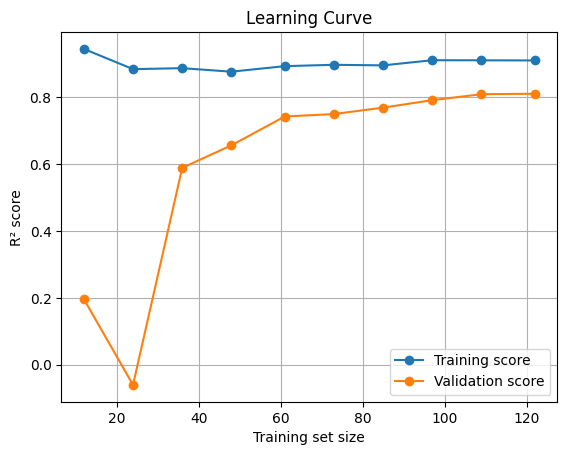

In [57]:

plt.figure()
plt.plot(train_sizes, train_mean, marker='o', label='Training score')
plt.plot(train_sizes, val_mean, marker='o', label='Validation score')

plt.xlabel('Training set size')
plt.ylabel('R² score')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)

plt.show()

In [59]:
#model fitting
model=pipeline_model.fit(X_train,y_train)
y_pred =model.predict(X_test)



In [61]:
#Evaluate the prediction

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
rmse = np.sqrt(260.1539543282025)
rmse



MSE: 260.1539543282025


np.float64(16.12928871116772)

On average, your model’s AQI predictions are off by about 16 AQI units.

In [62]:
#lets also compare with baseline data
baseline_data = y_train.mean()
baseline_mse = mean_squared_error(y_test, [baseline_data] * len(y_test))
baseline_rmse = np.sqrt(baseline_mse)
print("Baseline RMSE:", baseline_rmse)

Baseline RMSE: 90.05811635071403


In [63]:
##ensuring the model learn from the train not just memorize
from sklearn.model_selection import cross_val_score

cv_r2 = cross_val_score(
    pipeline_model,
    X,
    y,
    cv=5,
    scoring='r2'
)

print("CV R² mean:", cv_r2.mean())
print("CV R² std:", cv_r2.std())

CV R² mean: 0.8086999758153046
CV R² std: 0.11481978600802105


Five-fold cross-validation yielded a mean R² of 0.81 with a standard deviation of 0.11, indicating strong and consistent generalization performance across different data splits.

visual check between actual result and predicted restult

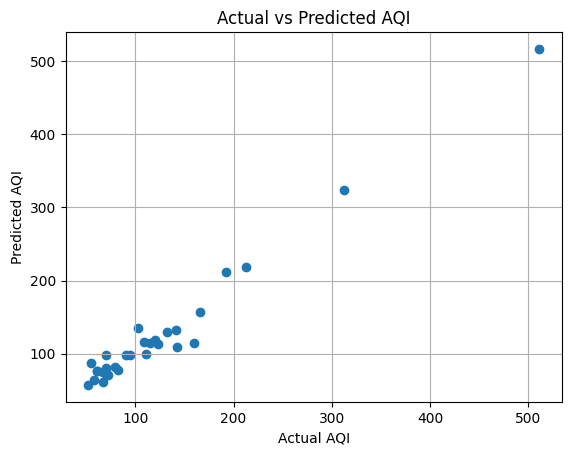

In [64]:
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI")
plt.grid(True)
plt.show()

In [65]:
import joblib

joblib.dump(pipeline_model, "aqi_sgd_model.pkl")


['aqi_sgd_model.pkl']

The final trained model was saved using joblib, enabling efficient reuse and deployment without retraining.